<a href="https://colab.research.google.com/github/ashwanidv100/Data-Analysis-Task/blob/master/ML_Intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Intern @ Vahan

### Task:  Analysis on Sample raw twitter data

## Problem Description:
**You are provided a sample raw twitter metadata data. Your task is to process and clean this
data to extract the core content of the tweet and then draw a at least 2 meaningful insights from
the data e.g., most tweeted twitter handle, some statistical insight, distribution of topic or
sentiment of tweets, OR anything you find noteworthy about this dataset**

##Objective:
**Write an jupyter notebook to**<br>
**1. Pre-process/clean raw twitter data**<br>
**2. Investigate and draw insights from the data**

# Solution 

In [ ]:
# Importing required Libraries such as numpy, pandas matplotlib, etc .
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import csv
import seaborn as sns
%matplotlib inline

In the next code cell, I have started three new new empty list, to divide and store raw data into proper tabular format.

In [ ]:
# x,y,z are new empyt list, where I am going to store id, polarity, tweet respectively
x=[]
y=[]
z=[]

# using built-in open() function to read csv file that returns file object
with open('twitter_data.csv','r') as f:
    reader = csv.reader(f)
    for row in reader:                                             # read every single rows in data file
        a= row[0]                                                  # at first, there is only 1 column, so I am using index '0'        
        new_rows = re.sub('[,]','',str(a))                         # using regex to substitute all ',' with blank space ''
        new_row = re.sub('["]','',str(new_rows))                   # using regax to substitute all '"' with blank space ''
        new_col = new_row.split(';')                               # splting the string from ';' and that create 3 new sub-strings
        
        # new_col have forms every row as a list with 3 elements where as they contains 
        #1st: id's, 2nd: polarity, 3rd: tweet
 
        x.append(new_col[0])                                       # adding 1st elemnts of every row to empty list 'x'
        new_col.pop(0)                                             # using built-in pop() function to remove element 'id'
        y.append(new_col[1])                                       # adding 2nd elemnts of every row to empty list 'y'
        new_col.pop(1)                                             # using built-in pop() function to remove element 'polarity'         
        ''.join(new_col)                                           # now join the remaining elements as 'tweet' 
        z.append(new_col[0])                                       # adding 3rd elemnts of every row to empty list 'z'

# Converting all list into dataframe using pandas with three columns
# where column names, x[0]= id, y[0]= polarity, z[0]= tweet
df = pd.DataFrame(data={ x[0]:x, y[0]:y, z[0]:z})

# droping the index value of dataframe
df = df.drop(df.index[0])
print(df)
data= df.to_csv("Clean_twitter_data_1.csv", sep=',',index=False)

              id polarity                                              tweet
1     1467933112        0  the angel is going to miss the athlete this we...
2     2323395086        0  It looks as though Shaq is getting traded to C...
3     1467968979        0     @clarianne APRIL 9TH ISN'T COMING SOON ENOUGH 
4     1990283756        0  drinking a McDonalds coffee and not understand...
5     1988884918        0  So dissapointed Taylor Swift doesnt have a Twi...
6     1467984364        0  Wishes I was on the Spring Fling Tour with Daw...
7     1964951623        0  got a sniffle got the kids and hubby just left...
8     1881133744        0  i've only been in sydney for 3 hrs but I miss ...
9     1753802024        0                       xboxtweet not working again 
10    1980497384        0        R.I.P to lebron/kobe puppet commercials... 
11    1755405128        0  Allergies sucks sometimes. Theres a super ador...
12    1966205498        0                               has a broken iphone 

In [ ]:
# Importing the new_clean_data (.csv) file
new_data = pd.read_csv("Clean_twitter_data_1.csv")

# View top 10 rows of new_clean_data collection
new_data.head(10)

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...
5,1467984364,0,Wishes I was on the Spring Fling Tour with Daw...
6,1964951623,0,got a sniffle got the kids and hubby just left...
7,1881133744,0,i've only been in sydney for 3 hrs but I miss ...
8,1753802024,0,xboxtweet not working again
9,1980497384,0,R.I.P to lebron/kobe puppet commercials...


In [ ]:
new_data.shape            # To check the shape of raw_data (rows, columns)

(2034, 3)

In [ ]:
new_data.info()           # To check the raw_data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 3 columns):
id          2034 non-null int64
polarity    2034 non-null int64
tweet       2034 non-null object
dtypes: int64(2), object(1)
memory usage: 47.8+ KB


In [ ]:
new_data.describe()        # Description the new_clean_data 

,id,polarity
count,2.034000e+03,2034.000000
mean,1.897987e+09,1.242871
std,2.858502e+08,1.851605
min,1.467812e+09,0.000000
25%,1.557154e+09,0.000000
50%,1.978393e+09,0.000000
75%,2.174644e+09,4.000000
max,2.329028e+09,4.000000


# Sentiment Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


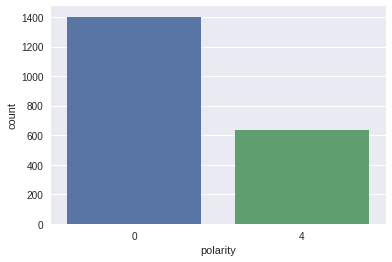

In [ ]:
# Visualization on polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
sns.countplot(x='polarity', data = new_data)

---
**It's looks like around 1400 tweets has the polarity of 'Negative' and around 650 has the polarity of 'Positive'. Lets chek the exact figure :**

---

In [ ]:
new_data[new_data.polarity == 0]                 

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...
5,1467984364,0,Wishes I was on the Spring Fling Tour with Daw...
6,1964951623,0,got a sniffle got the kids and hubby just left...
7,1881133744,0,i've only been in sydney for 3 hrs but I miss ...
8,1753802024,0,xboxtweet not working again
9,1980497384,0,R.I.P to lebron/kobe puppet commercials...


In [ ]:
new_data[new_data.polarity == 4]

,id,polarity,tweet
77,1680347120,4,@ mcdonalds with my litto sis aka cuzin lol cr...
78,1835259469,4,@AnnaSaccone Love your new cards! I would de...
79,1983068285,4,@supricky06 that was one of the most enjoyable...
80,1559842363,4,Dallas vegas goodness http://twitpic.com/3lzt...
81,1999078293,4,@JBsFanArgentina Hey I luv this pic!!! was ama...
82,2053185460,4,@llmatticusll yuuuup! 9 miles it's for cancer...
83,1565998071,4,@seanmurphymusic I'am in love with Taylor Swif...
84,2190562741,4,Had a piece of fried chicken some PSP luv and ...
85,1973399754,4,@mileycyrus BRAZIL LOVES U SO MUCH!! YOU ARE A...
86,1965391855,4,@SilMuri yeah that'd be awesome... You're gonn...


---


**Now we exactly now the number of positive and negative polarity tweets (Negative = 1402, Positive =632), in Total = 2034**


---

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


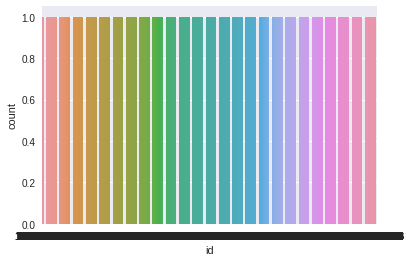

In [ ]:
sns.countplot(x='id', data = new_data)                  # Check the uniqueness of twitter IDs

# Data Preparation
Lets take a look at the lenght of tweets

In [ ]:
new_data['tweet_len'] = [len(t) for t in new_data.tweet]        # adding a new column(tweet_len) having the lenghts of string in tweet
new_data

,id,polarity,tweet,tweet_len
0,1467933112,0,the angel is going to miss the athlete this we...,52
1,2323395086,0,It looks as though Shaq is getting traded to C...,126
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH,46
3,1990283756,0,drinking a McDonalds coffee and not understand...,100
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...,51
5,1467984364,0,Wishes I was on the Spring Fling Tour with Daw...,52
6,1964951623,0,got a sniffle got the kids and hubby just left...,89
7,1881133744,0,i've only been in sydney for 3 hrs but I miss ...,79
8,1753802024,0,xboxtweet not working again,28
9,1980497384,0,R.I.P to lebron/kobe puppet commercials...,43


In [ ]:
a=  max(new_data.tweet_len)                  #maximum length of tweet
print(a)

138


In [ ]:
b=  min(new_data.tweet_len)                  #minimum lenght of tweet
print(b)

4


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


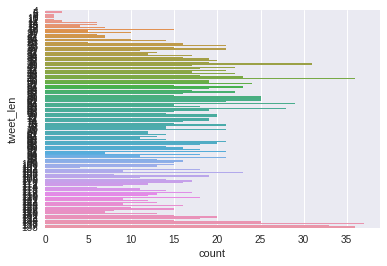

In [ ]:
sns.countplot(y='tweet_len', data = new_data)          # visualizing the tweet_len for overall distribution of length of strings in each entry



**It look like maximum lenght of tweet is 138 and minimum lenght is 4. But **




**As some of tweets @mention.
Even though @mention carries a certain information (which another user that the tweet mentioned), but this information doesn’t add value to build sentiment analysis model. **

In [ ]:
new_data.tweet[2]    # To see the tweet at index 2

"@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH "

In [ ]:
# define a function called 'count' return if tweet contains '@' means any mentions
def count(t):
  if '@' in t:
    return 1
  else:
    return 0 

# emplty list 'z' conating the values '0' for tweet has no mentions and '1' for having mentions
z= []
for i in new_data.tweet:
  x=count(i)
  z.append(x)

# Creating a new column 'Mentions'  and dding to a new_data
new_data['Mentions'] = z


In [ ]:
# View data
new_data

,id,polarity,tweet,tweet_len,Mentions
0,1467933112,0,the angel is going to miss the athlete this we...,52,0
1,2323395086,0,It looks as though Shaq is getting traded to C...,126,0
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH,46,1
3,1990283756,0,drinking a McDonalds coffee and not understand...,100,0
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...,51,0
5,1467984364,0,Wishes I was on the Spring Fling Tour with Daw...,52,0
6,1964951623,0,got a sniffle got the kids and hubby just left...,89,0
7,1881133744,0,i've only been in sydney for 3 hrs but I miss ...,79,1
8,1753802024,0,xboxtweet not working again,28,0
9,1980497384,0,R.I.P to lebron/kobe puppet commercials...,43,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


,id,polarity,tweet,tweet_len,Mentions
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH,46,1
7,1881133744,0,i've only been in sydney for 3 hrs but I miss ...,79,1
13,1687790990,0,@stephnewby there is a virus going around con...,67,1
16,2258491381,0,@Rove1974 @Pink is our hero too! Love her! Wan...,117,1
25,1467985185,0,@d_castillo ugh that's disconcerting,37,1
27,2179698078,0,@TweetRamona too bad it's in seattle..,39,1
29,2299794306,0,@SeattleRealEst8 439 calories,29,1
30,1695998263,0,@mglickman that reminds me of a bit howard ste...,131,1
32,1467932979,0,@lolitariot oh no hope you're not getting sic...,52,1
33,1468036579,0,@mykele sayyyy whaaaa? I wasn't invited...,43,1


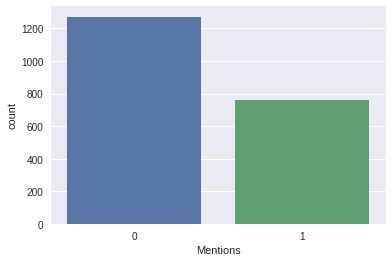

In [ ]:
# To check how many tweets has mentions in it 
sns.countplot(x='Mentions', data = new_data)
new_data[new_data.Mentions == 1]

In [ ]:
# importing string liberary to analyse the tags
import string

# creating the empty dictonary to store the sliced strings
tag_dict = {}

# Spliting the tweets
for i in new_data.tweet:
  tweet_tokenized= i.split()
  
  # if any tweet have any word started with '@', 
  #it will immediately stored in our empty dictonary with number of occurances in all tweets
  for j in tweet_tokenized:
    if(j[0:1]== '@' and len(j)>1):
      key = j.translate(string.punctuation)
      if key in tag_dict:
        tag_dict[key] += 1
      else:
        tag_dict[key]  = 1

# View the 'Mentions' used in tweets and number of occurances in all tweets
tags = pd.DataFrame([key for key in tag_dict.items()], columns= ["Mentions", "No. of Occurance"])
tags

,Mentions,No. of Occurance
0,@clarianne,1
1,@ktjade!!!,1
2,@stephnewby,1
3,@Rove1974,1
4,@Pink,1
5,@d_castillo,1
6,@TweetRamona,1
7,@SeattleRealEst8,1
8,@mglickman,1
9,@lolitariot,1


**To be exact 762 tweets has Mentions and 1272 tweets does not. But we find 709 tweet mentions only that means few tweet has similar mentions.**


## **Not to mention, Even though @mention carries a certain information (which another user that the tweet mentioned), this information doesn’t add value to build sentiment analysis model.**

In [ ]:
# define a function called 'count' return if tweet contains 'https' and 'http' means URL's
def count(t):
  if 'https' and 'http' in t:
    return 1
  else:
    return 0 

  
# emplty list 'z' conating the values '0' for tweet has no URL's and '1' for having the URL's
z= []
for i in new_data.tweet:
  x=count(i)
  z.append(x)
  

# Creating a new column 'URL'  and adding to a new_data
new_data['URL'] = z
new_data

,id,polarity,tweet,tweet_len,Mentions,URL
0,1467933112,0,the angel is going to miss the athlete this we...,52,0,0
1,2323395086,0,It looks as though Shaq is getting traded to C...,126,0,0
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH,46,1,0
3,1990283756,0,drinking a McDonalds coffee and not understand...,100,0,0
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...,51,0,0
5,1467984364,0,Wishes I was on the Spring Fling Tour with Daw...,52,0,0
6,1964951623,0,got a sniffle got the kids and hubby just left...,89,0,0
7,1881133744,0,i've only been in sydney for 3 hrs but I miss ...,79,1,0
8,1753802024,0,xboxtweet not working again,28,0,0
9,1980497384,0,R.I.P to lebron/kobe puppet commercials...,43,0,0


In [ ]:
new_data[new_data.URL == 1]
#sns.countplot(x='URL', data = new_data)

,id,polarity,tweet,tweet_len,Mentions,URL
74,1982967985,0,It's no longer sunny in Seattle. http://tr.im...,61,0,1
79,1983068285,4,@supricky06 that was one of the most enjoyable...,111,1,1
80,1559842363,4,Dallas vegas goodness http://twitpic.com/3lzt...,75,0,1
158,2003014069,0,Loss it tough for fans and Lebron yes indeed ...,63,0,1
169,1836028000,4,@googoodolls http://twitpic.com/56m0y - Really...,103,1,1
204,1822865989,4,http://twitpic.com/5c9gs - A picture of Taylor...,126,0,1
241,1573717335,0,This is wario I wish there is wario land game ...,135,0,1
252,1997997283,0,No more orange drink at Mcdonalds http://tiny...,60,0,1
270,1880879216,4,http://twitpic.com/5oll7 - We are on board.......,109,0,1
279,2070088074,4,@lancearmstrong http://twitpic.com/6vb49 - wow...,117,1,1


**So, 67 tweets contains URL's including both 'https://' and 'http://'**

In [ ]:
# importing string liberary to analyse the tags
import string

# creating the empty dictonary to store the sliced strings
tag_dict = {}

# Spliting the tweets
for i in new_data.tweet:
  tweet_tokenized= i.split()
  #print(tweet_tokenized)
  
  # if any tweet have any word started with 'http', 
  #it will immediately stored in our empty dictonary with number of occurances in all tweets
  for j in tweet_tokenized:
    if(j[0:4]== 'http' and len(j)>4):
      print(j)
      key = j.translate(string.punctuation)
      if key in tag_dict:
        tag_dict[key] += 1
      else:
        tag_dict[key]  = 1

# View the 'Mentions' used in tweets and number of occurances in all tweets
tags = pd.DataFrame([key for key in tag_dict.items()], columns= ["URLs", "No. of Occurance"])
len(tags)

http://tr.im/sunnyinseattle
http://bit.ly/1a7zPw
http://twitpic.com/3lzt1
http://tr.im/n9Cr
http://twitpic.com/56m0y
http://twitpic.com/5c9gs
http://bkite.com/06H8T
http://tinyurl.com/l2m3hb
http://twitpic.com/5oll7
http://twitpic.com/6vb49
http://bit.ly/zp3If
http://tinyurl.com/cspspj
http://twitpic.com/6ubr9
http://digg.com/d1p1zg
http://bit.ly/hPNrI
http://tinyurl.com/muu2rr
http://ff.im/1XTTi
http://v.cristdr.com/3MK
http://apod.nasa.gov/apod/ap090526.html
http://plurk.com/p/yvm9q
http://bit.ly/17nwOf
http://bit.ly/17NsuD
http://twitpic.com/7pf62
http://bit.ly/u6brY
http://twitpic.com/6idya
http://bit.ly/rwa5x
http://bit.ly/hcsm7
http://tinyurl.com/freeringring
http://twitpic.com/6r413
http://bit.ly/ebPBZ
http://twitpic.com/7e01t
http://plurk.com/p/y4i9y
https://www.mycomicshop.com/search?TID=395031
http://tinyurl.com/cxe8w7
http://apps.facebook.com/dogbook/profile/view/5248435
http://tweet.sg
http://tinyurl.com/cuggsh
http://tr.im/sunnyinseattle
http://twitpic.com/2y36e
http://sea

67

In [ ]:
# creating a empty list that conatining the new tweets without any mentions
z=[]
for t in new_data.tweet:
  a = re.sub(r'@[A-Za-z0-9]+','',t)
  z.append(a)
  
# replacing the older tweets(has mention) with new tweets without having any mentions 
new_data['tweet'] = z
new_data

,id,polarity,tweet,tweet_len,Mentions,URL
0,1467933112,0,the angel is going to miss the athlete this we...,52,0,0
1,2323395086,0,It looks as though Shaq is getting traded to C...,126,0,0
2,1467968979,0,APRIL 9TH ISN'T COMING SOON ENOUGH,46,1,0
3,1990283756,0,drinking a McDonalds coffee and not understand...,100,0,0
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...,51,0,0
5,1467984364,0,Wishes I was on the Spring Fling Tour with Daw...,52,0,0
6,1964951623,0,got a sniffle got the kids and hubby just left...,89,0,0
7,1881133744,0,i've only been in sydney for 3 hrs but I miss ...,79,1,0
8,1753802024,0,xboxtweet not working again,28,0,0
9,1980497384,0,R.I.P to lebron/kobe puppet commercials...,43,0,0


In [ ]:
# define a function called 'count' return if tweet contains '#' means any tags associated with tweet
def count(t):
  if '#' in t:
    return 1
  else:
    return 0 

# emplty list 'z' conating the values '0' for tweet has no tags and '1' for having tags
z= []
for i in new_data.tweet:
  x=count(i)
  z.append(x)

# Creating a new column 'Hashtags'  and dding to a new_data
new_data['Hashtags'] = z
new_data

,id,polarity,tweet,tweet_len,Mentions,URL,Hashtags
0,1467933112,0,the angel is going to miss the athlete this we...,52,0,0,0
1,2323395086,0,It looks as though Shaq is getting traded to C...,126,0,0,0
2,1467968979,0,APRIL 9TH ISN'T COMING SOON ENOUGH,46,1,0,0
3,1990283756,0,drinking a McDonalds coffee and not understand...,100,0,0,0
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...,51,0,0,0
5,1467984364,0,Wishes I was on the Spring Fling Tour with Daw...,52,0,0,0
6,1964951623,0,got a sniffle got the kids and hubby just left...,89,0,0,0
7,1881133744,0,i've only been in sydney for 3 hrs but I miss ...,79,1,0,0
8,1753802024,0,xboxtweet not working again,28,0,0,0
9,1980497384,0,R.I.P to lebron/kobe puppet commercials...,43,0,0,0


In [ ]:
# view the tweets that have Hashtags
new_data[new_data.Hashtags == 1]


,id,polarity,tweet,tweet_len,Mentions,URL,Hashtags
20,1975133437,0,I wish diversity was like one of those musicia...,92,0,0,1
34,1467913111,0,#3 woke up and was having an accident - &quot,45,0,0,1
42,2200029856,0,#haveyouever wished microsoft never had to upd...,96,0,0,1
123,1978262839,4,Go #Lakers go! Good morning!,39,1,0,1
125,1994187668,4,Wow Announcement of new Halo game from Bungie ...,111,0,0,1
130,1994142180,4,#xboxe3 Gameplay looks awesome just as always ...,59,0,0,1
141,1685666978,0,yea man Missing #bck5 really hard. I am at M...,105,1,0,1
165,2256282440,0,Kelly Clarkson CD is already in. This is goin...,132,1,0,1
171,1993817089,4,Modern warfare 2 gameplay looks goood #xboxe3,46,0,0,1
301,1976960923,4,Anyone else love the fact that they #Lakers ar...,109,0,0,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


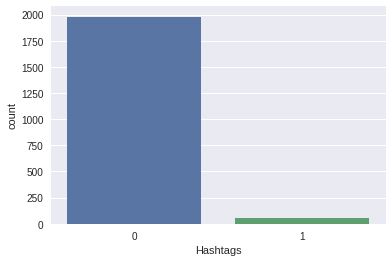

In [ ]:
sns.countplot(x='Hashtags', data = new_data)

**There are only 61 tweets that has ''#Tags' in it. Lets see, what the tag are?  
And how many tweets has the similar tags**




In [ ]:
# importing string liberary to analyse the tags
import string

# creating the empty dictonary to store the sliced strings
tag_dict = {}

# Spliting the tweets
for i in new_data.tweet:
  tweet_tokenized= i.split()
  
  # if any tweet have any word started with '#', 
  #it will immediately stored in our empty dictonary with number of occurances in all tweets
  for j in tweet_tokenized:
    if(j[0:1]== '#' and len(j)>1):
      key = j.translate(string.punctuation)
      if key in tag_dict:
        tag_dict[key] += 1
      else:
        tag_dict[key]  = 1

# View the 'Hashtags' used in tweets and number of occurances in all tweets
tags = pd.DataFrame([key for key in tag_dict.items()], columns= ["Hashtags", "No. of Occurance"])
tags

,Hashtags,No. of Occurance
0,#bgt,1
1,#3,1
2,#haveyouever,1
3,#Lakers,2
4,#xboxe3,4
5,#bck5,1
6,#blamedrewscancer.,1
7,#Kobe,1
8,#5,1
9,#shaundiviney#bradiewebb...,1


## **Sometimes hashtags provide useful information about tweets, I leave the text intact and just remove the ‘#’**

In [ ]:
# creating a empty list that conatining the new tweets without any Hashtags
z=[]
for t in new_data.tweet:
  a = re.sub("[^a-zA-Z0-9]", " ", t)
  z.append(a)
  
# replacing the older tweets(has hashtags) with new tweets without having any Hashtags 
new_data['tweet'] = z
new_data  


,id,polarity,tweet,tweet_len,Mentions,URL,Hashtags
0,1467933112,0,the angel is going to miss the athlete this we...,52,0,0,0
1,2323395086,0,It looks as though Shaq is getting traded to C...,126,0,0,0
2,1467968979,0,APRIL 9TH ISN T COMING SOON ENOUGH,46,1,0,0
3,1990283756,0,drinking a McDonalds coffee and not understand...,100,0,0,0
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...,51,0,0,0
5,1467984364,0,Wishes I was on the Spring Fling Tour with Daw...,52,0,0,0
6,1964951623,0,got a sniffle got the kids and hubby just left...,89,0,0,0
7,1881133744,0,i ve only been in sydney for 3 hrs but I miss ...,79,1,0,0
8,1753802024,0,xboxtweet not working again,28,0,0,0
9,1980497384,0,R I P to lebron kobe puppet commercials,43,0,0,0


In [ ]:
new_data.tweet[34]

# Export the 2nd csv file with clean data(Clean_twitter_data_2.csv)
new_data.to_csv("Clean_twitter_data_2.csv", sep=',',index=False)

In [ ]:
# Removing few columns('tweet_len','Mentions','Hashtags') to make a orginial dataset
new_data.drop(['tweet_len','Mentions','Hashtags','URL'],axis= 1,inplace=True)
new_data

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,APRIL 9TH ISN T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...
5,1467984364,0,Wishes I was on the Spring Fling Tour with Daw...
6,1964951623,0,got a sniffle got the kids and hubby just left...
7,1881133744,0,i ve only been in sydney for 3 hrs but I miss ...
8,1753802024,0,xboxtweet not working again
9,1980497384,0,R I P to lebron kobe puppet commercials


In [ ]:
# Converting all the upper case alphabets to lower case 
# to prepare final clean dataset

z=[]
for i in new_data.tweet:
  z.append(i.lower())

new_data['tweet']= z
new_data  

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,it looks as though shaq is getting traded to c...
2,1467968979,0,april 9th isn t coming soon enough
3,1990283756,0,drinking a mcdonalds coffee and not understand...
4,1988884918,0,so dissapointed taylor swift doesnt have a twi...
5,1467984364,0,wishes i was on the spring fling tour with daw...
6,1964951623,0,got a sniffle got the kids and hubby just left...
7,1881133744,0,i ve only been in sydney for 3 hrs but i miss ...
8,1753802024,0,xboxtweet not working again
9,1980497384,0,r i p to lebron kobe puppet commercials


In [ ]:
# Export the Final csv file with clean data(Final_clear_twitter_data.csv)
new_data.to_csv("Final_clear_twitter_data.csv", sep=',',index=False)

## **Finally, I think the Twitter data is completely prepared and as I showed, it is easy, but utilising them requires a knowledge of data cleaning, presentation, and more.  I think this presentation is easy to understand and re-used by any technical or non-technical person. I am also sharing the exported spreadsheets(.csv file) to use it for futhur Data analysis. **